<a href="https://colab.research.google.com/github/Rendrikson98/Aprendizado-de-M-quina/blob/master/agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Leitura dos dados com o Pandas**

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset - heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**2. Limpeza dos dados com o Pandas**

In [471]:

#Verificar se existem valores NAN, ? ou dados faltantes
data = data.dropna()
#Excluir colunas irrelevantes
#data = data.drop(columns=['creatinine_phosphokinase', 'platelets', 'serum_sodium', 'ejection_fraction', 'serum_creatinine', 'sex'])


data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**3. Re-escala dos dados**

In [472]:
data = (data - data.min())/(data.max()-data.min())
#converting age into int type

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


**4. Organizando dados da modelagem**

In [473]:
X = data.iloc[:,[0,4,7,11]]
X.head()

,age,ejection_fraction,serum_creatinine,time
0,0.636364,0.090909,0.157303,0.000000
1,0.272727,0.363636,0.067416,0.007117
2,0.454545,0.090909,0.089888,0.010676
3,0.181818,0.090909,0.157303,0.010676
4,0.454545,0.090909,0.247191,0.014235


In [474]:
y = data.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

**5. Definindo o algoritmo de agrumento**

**Criando o modelo e ajustando aos dados**

In [475]:
#agrupamento
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Aplicando o modelo aos dados de teste** 

In [476]:
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtyp

**Visualizando os resultados do agrupamento**

In [477]:
X = X.reset_index(drop=True)

In [478]:
# adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'DEATH_EVENT',grupos)


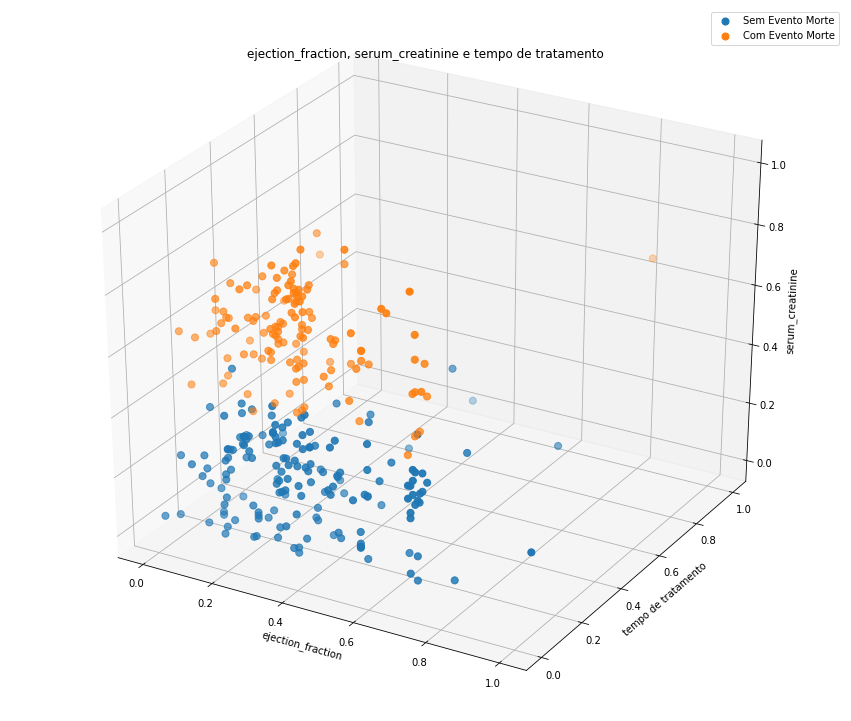

In [479]:

ComEventoMorte = X[X['DEATH_EVENT']==1]
SemEventoMorte = X[X['DEATH_EVENT']==0]

plt.rcParams["figure.figsize"] = (15,13)

#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(SemEventoMorte.ejection_fraction,SemEventoMorte.serum_creatinine,SemEventoMorte.time,s=50,label='Sem Evento Morte')
ax.scatter3D(ComEventoMorte.ejection_fraction,ComEventoMorte.serum_creatinine,ComEventoMorte.time,s=50,label='Com Evento Morte')
plt.legend()
ax.set_xlabel('ejection_fraction')
ax.set_ylabel('tempo de tratamento')
ax.set_zlabel('serum_creatinine')
plt.title('ejection_fraction, serum_creatinine e tempo de tratamento')
plt.show()

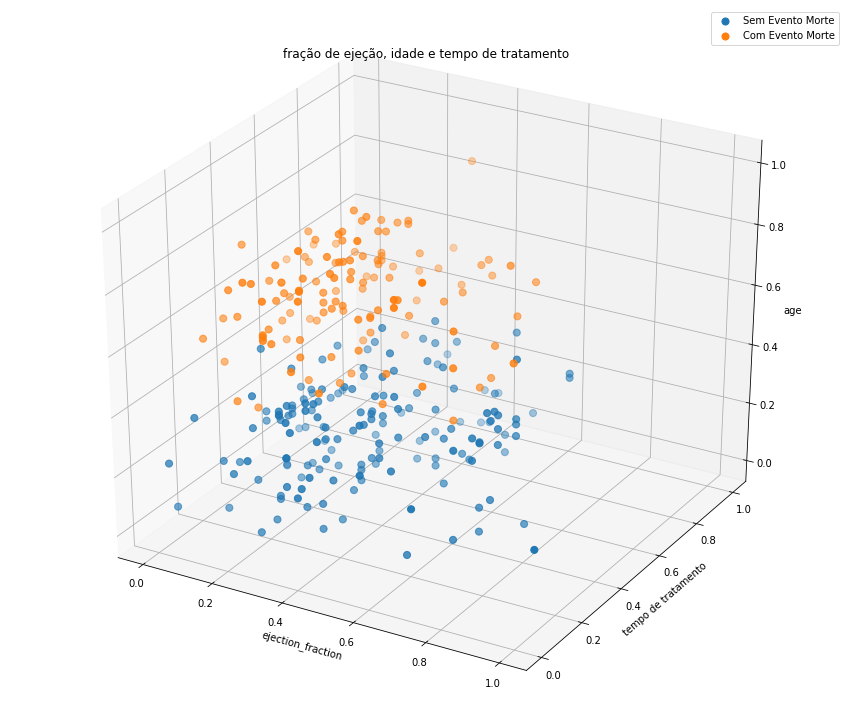

In [480]:
plt.rcParams["figure.figsize"] = (15,13)

#plotando alguns atributos das classes
ax = plt.axes(projection='3d')
ax.scatter3D(SemEventoMorte.ejection_fraction,SemEventoMorte.age,SemEventoMorte.time,s=50,label='Sem Evento Morte')
ax.scatter3D(ComEventoMorte.ejection_fraction,ComEventoMorte.age,ComEventoMorte.time,s=50,label='Com Evento Morte')
plt.legend()
ax.set_xlabel('ejection_fraction')
ax.set_ylabel('tempo de tratamento')
ax.set_zlabel('age')
plt.title('fração de ejeção, idade e tempo de tratamento')
plt.show()

In [481]:
plt.rcParams["figure.figsize"] = (25,20)

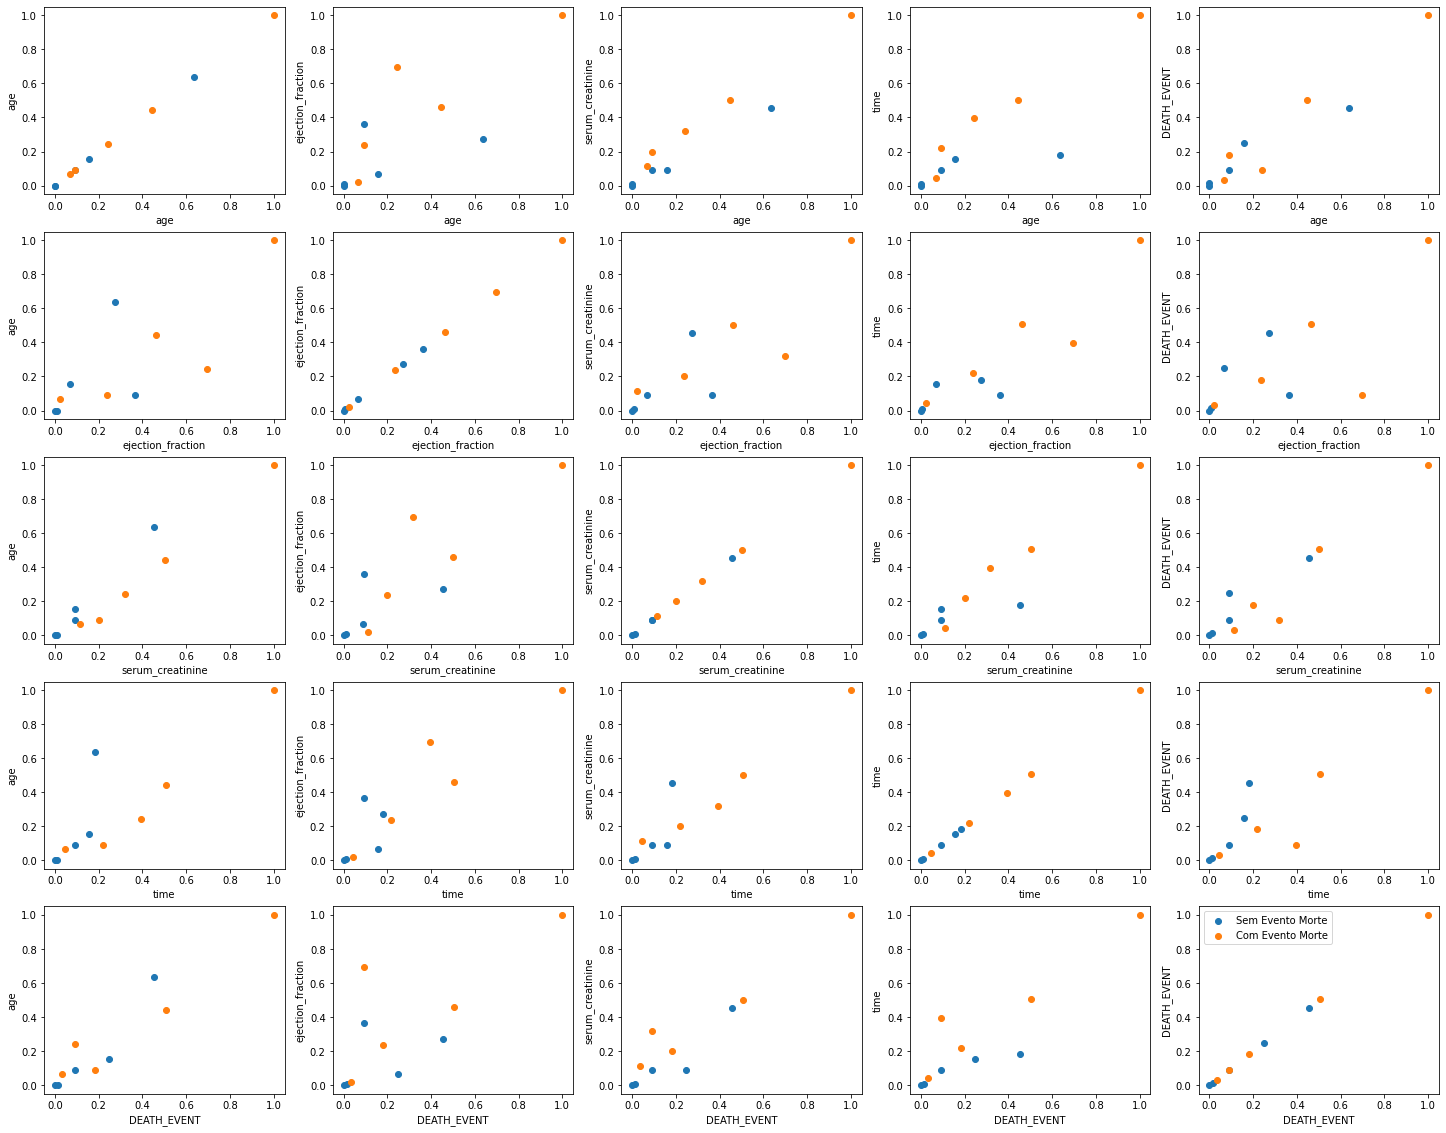

In [482]:

#plotando comparação de alguns atributos
fig, axs = plt.subplots(5,5)
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(SemEventoMorte.iloc[i],SemEventoMorte.iloc[j],label='Sem Evento Morte')
    axs[i,j].scatter(ComEventoMorte.iloc[i],ComEventoMorte.iloc[j],label='Com Evento Morte')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

**7. Avaliando o modelo**

In [483]:
from sklearn.metrics import accuracy_score

In [484]:
acuracia = accuracy_score(y,kmeans_labels)
print('Acuracia: '+ str(round(acuracia,3)))

Acuracia: 0.358


In [485]:
from sklearn.metrics import adjusted_rand_score

rand_score = adjusted_rand_score(y,kmeans_labels)
print('Índice Rand Ajustado: '+str(rand_score))

Índice Rand Ajustado: 0.07614560874530288


In [486]:
from sklearn.metrics import fowlkes_mallows_score

fm = fowlkes_mallows_score(y,kmeans_labels)
print('Fowlkes-Mallows scores: '+str(fm))

Fowlkes-Mallows scores: 0.5695753461685632


**Métricas quando as classes não são conhecidas**



**Índice Davies-Boldin**

In [487]:
#excluindo a coluna diagnóstico
X = X.drop(columns=['DEATH_EVENT'])


from sklearn.metrics import davies_bouldin_score

db = davies_bouldin_score(X,kmeans_labels)
print('Índice Davies-Boldin: '+ str(db))

Índice Davies-Boldin: 1.1914402081002522


**Coeficiente de Silhueta**

In [488]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(X,kmeans_labels,metric='euclidean')
print('Coeficiente de Silhuenta: '+ str(ss))

Coeficiente de Silhuenta: 0.3316565821365872


**Índice Calinski-Harabasz**

In [489]:
from sklearn.metrics import calinski_harabasz_score


ch = calinski_harabasz_score(X,kmeans_labels)
print('Índice Calinski-Harabasz: '+ str(ch))

Índice Calinski-Harabasz: 169.33674920130323


**Agrupamento Hierárquico**

**Agrupamento Hierárquico Aglomerativo**

In [490]:
from sklearn.cluster import AgglomerativeClustering

**Definindo modelo e realizando o agrupamento**

In [491]:
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

labels_hierarquico

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Avaliando o modelo**

In [492]:
#acurácia
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)


0.368

In [493]:
#índice rand ajustado
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

0.06392421687906212

In [494]:
#índice Fowlkes Mallows
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.5662770416700609

In [495]:
#indice Davies-Boldin
db = davies_bouldin_score(X,labels_hierarquico)
db


1.2066716006441964

In [496]:

#coeficiente de silhueta
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss


0.3207165494758234

In [497]:
#indice de Calinski-Harabasz
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

159.91698935287897

**Interpretação**

Foi possível observa que dentre os 5 parâmetros utilizados o que nos mostrou maior atenção é a realação entre o tempo do tratamento e a idade do paciente. Esse dois parâmetros estão diretamente ligados com eventos de mortes que aconteceram por doenças cadiovasculares. O que nos leva a interpretação que a realização de exames preventivos para o tratamento de doenças cardiovasculares caso necessário é de suma importância para diminuição dos eventos de morte.

Em nossa avalição do modelo tivemos como resultado uma baixa acurácia dos dados, porém como o trabalho está sendo realizado com agrupamentos esse método não é muito utilizado na prática e por isso não foi dado tanta importancia para o seu resultado, apesar de que esforços foram realizados para melhorar o seu valor. 
Seguindo para o **Índice rand ajustado** tivemos um bom resultado que se aproximou de 1, mostrando assim que a similaridade entra as atribuições foram boas.

Com as Métricas quando as classes não são conhecidas provaram o fato entre a similiariadde média entre os dados, mas nesse caso entre os grupos, já que foi utilizado o **índice Davies-Boldin** o qual obtemos um resultado superior a 1. Com isso foi levantado o questionamento entre a distâncias entre as instância do grupos, se a similiaridade e a distância da instâncias estavam diretamente ligadas e ambos teriam um bom resultado. Porém, ao aplicar o coeficiente de Silhueta foi possível observar que a distância média entre nossas instâncias não era boas, tendo um resultado de 0,33. foi aí que surgiu a necessidade de medir a taxa de dispersão entre os grupos utilizando o **Índice de Calinski-Harabasz**. Os resultados mostraram que a dispersão entre nosso grupos não é considerada boa pois teve resultado de 169.

Com o agrupamento hierárquico tivemos resultado piores que os anteriores com  exceção de algumas métricas que tiveram resultado melhores ínfimos.